# ROHAN KUMAR

# The Sparks Foundation Internship for Data Science
### Data Science & Business Analytics Tasks

## Prediction using Unsupervised ML (Level-Beginner)
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing scikit learn clutering model
from sklearn.cluster import KMeans

## Load the iris dataset

In [2]:
iris_df = pd.read_csv('Iris.csv')

iris_df.drop(columns='Id', inplace=True)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking for null values
iris_df.isna().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

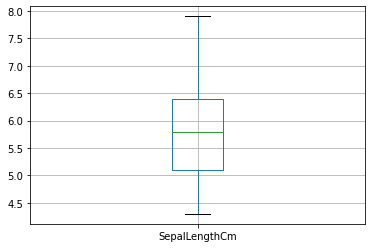

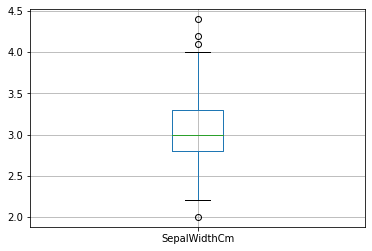

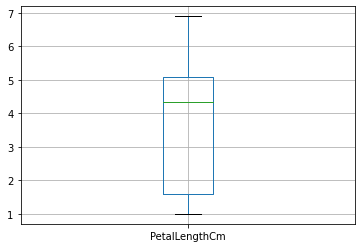

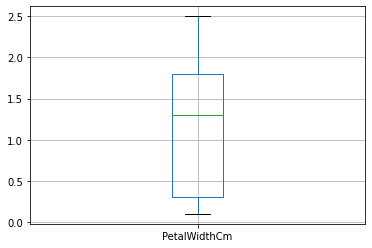

In [4]:
# plotting boxplot of each column 
for col in iris_df.drop(columns = 'Species'):
    plt.figure()
    iris_df.boxplot([col])

In [5]:
# some basic statistics
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


**CLearly, there are no null value as well as no outliers.**

# Finding the optimal number of clusters using Elbow Method
Plotting the  Within-Cluster-Sum-of-Squares (WCSS) vs number of neighbors(k).

In [6]:
# determining the features(X) and target(y) values
y = iris_df['Species']
X = iris_df.drop(columns='Species')

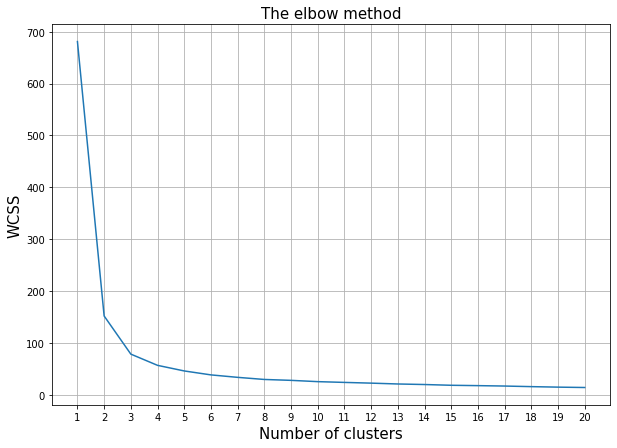

In [7]:
WCSS = []

for i in range(1, 21):
    # intialising model instance with different number of clusters and fitting it.
    kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 35)
    kmeans.fit(X)
    # appending WCSS
    WCSS.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(10,7))
plt.plot(range(1, 21), WCSS)
plt.title('The elbow method', size=15)
plt.xlabel('Number of clusters', size=15)
plt.ylabel('WCSS', size=15)
plt.xticks(range(1, 21))
plt.grid()
plt.show()

We choose the number of clusters as **3**, because after this point, there is not so much significant decrease in the value of the WCSS.

# Plotting Clusters as predicted by KMeans

In [8]:
# creating new instance and predicitng clusters
kmeans = KMeans(n_clusters=3)
cluster_preds = kmeans.fit_predict(X)

# adding as a column in dataset
iris_df['Clusters'] = cluster_preds

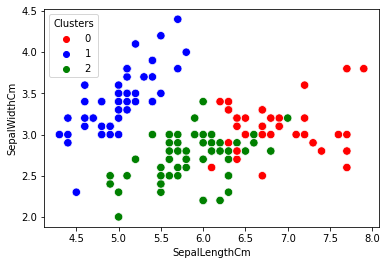

In [9]:
# Sepals properties
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data = iris_df, hue='Clusters',
                palette=['red','blue','green'], s=70)
plt.show()

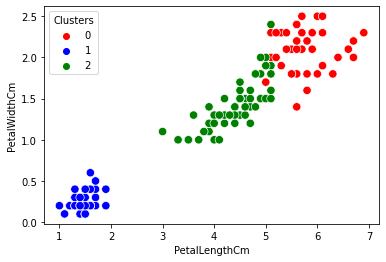

In [10]:
# Petals properties
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm', data = iris_df, hue='Clusters',
                palette=['red','blue','green'], s=70)
plt.show()

# Thank You